In [ ]:
from transformers import pipeline

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


'POSITIVE'

In [9]:
df = pd.read_csv("scraped_reviews.csv")

In [10]:
df.head(10)

,Review,Date
0,I’ve had to be on the phone a couple times wit...,19/01/2023
1,The lady I spoke with was lovely. She put me a...,20/01/2023
2,Absolutely avoid this company at all costs! Th...,18/01/2023
3,I switched through a guy called Craig from com...,19/01/2023
4,I spoke to a lady name Priyanka she was very h...,20/01/2023
...,...,...
612,"Very professional approach, efficient and answ...",27/01/2020
613,My wife while was working received a call by s...,15/01/2020
614,To get Customers This company employs agents t...,28/12/2019
615,As already scammed by your broker smarter powe...,19/12/2019


BERT has maximum of 512 words per sentence. There are some reviews with more words than that. Let's shorten them to fit and for the ML model to be able to be runned successfully.

In [42]:
sentiment = []
for review in df["Review"]:
    try:
      sentiment.append(sentiment_pipeline(review)[0]["label"])
    except:
      # Delete review from dataset if there was an error.
      df = df[df.Review != review]

In [45]:
len(sentiment), len(df)

(612, 612)

In [46]:
# Assign opinion.
df["Opinion"] = sentiment

In [50]:
df

,Review,Date,Opinion
0,I’ve had to be on the phone a couple times wit...,19/01/2023,POSITIVE
1,The lady I spoke with was lovely. She put me a...,20/01/2023,POSITIVE
2,Absolutely avoid this company at all costs! Th...,18/01/2023,NEGATIVE
3,I switched through a guy called Craig from com...,19/01/2023,NEGATIVE
4,I spoke to a lady name Priyanka she was very h...,20/01/2023,POSITIVE
...,...,...,...
612,"Very professional approach, efficient and answ...",27/01/2020,POSITIVE
613,My wife while was working received a call by s...,15/01/2020,NEGATIVE
614,To get Customers This company employs agents t...,28/12/2019,NEGATIVE
615,As already scammed by your broker smarter powe...,19/12/2019,NEGATIVE


POSITIVE    397
NEGATIVE    215
Name: Opinion, dtype: int64


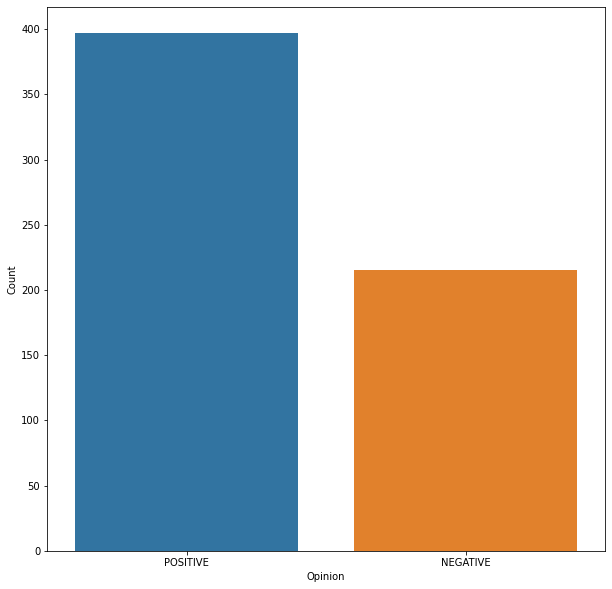

In [59]:
# Check value counts.
opinion_counts = df["Opinion"].value_counts()
print(opinion_counts)

# Set size.
plt.figure(figsize=(10,10))

# Create a bar plot using seaborn
sns.barplot(x=opinion_counts.index, y=opinion_counts.values)

# Add labels and show the plot
plt.xlabel("Opinion")
plt.ylabel("Count")
plt.show()

In [72]:
# Convert to datetime.
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
# Extract the year from the "date" column
df["Year"] = df["Date"].dt.year

# Group the dataframe by the "year" column and get the value counts of the "Opinion" column
df_yearly = df.groupby("Year")["Opinion"].value_counts(normalize=True)

In [73]:
df_yearly

Year  Opinion 
2019  NEGATIVE    0.666667
      POSITIVE    0.333333
2020  POSITIVE    0.764706
      NEGATIVE    0.235294
2021  POSITIVE    0.714286
      NEGATIVE    0.285714
2022  POSITIVE    0.614657
      NEGATIVE    0.385343
2023  POSITIVE    0.739130
      NEGATIVE    0.260870
Name: Opinion, dtype: float64

In [84]:
df.to_csv("classified_analysis.csv")

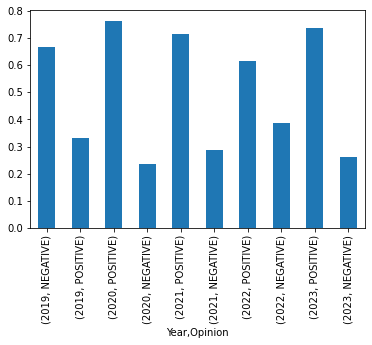

In [79]:
df_yearly.plot.bar()